### Log File ###
https://docs.google.com/document/d/1J0BhavsaOvLj2zazWyO4EYncpshuRhhFoclmYcd55-A/edit


### Imports ###

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Remove display restrictions
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 

### Read in File ###

In [4]:
# File path for file
file_path1 = '/Users/udoychowdhury/Documents/Assitantship/Conditionally Admitted Students Updated.xlsx'
file_path2 = '/Users/udoychowdhury/Documents/Assitantship/Spring 2023 Registered Students.xlsx'

# Read the Excel file
admitdf = pd.read_excel(file_path1)

springdf = pd.read_excel(file_path2)

#### Merge the df on ID

In [5]:
# Merge the DataFrames
merged_df = pd.merge(admitdf, springdf, on='ID', how='inner')

In [7]:
display(merged_df.head())

,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,SARADAP_MAJR_CODE_1,SARADAP_PROGRAM_1,SARADAP_MAJR_CODE_CONC_1,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,COL_DESC,COL_STATE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE,E04,Registration Status,Admissions Status,Matriculation Status,Attendance Status,Class Level,Total Credits Enrolled,County,School,Program,Degree,Maj_Acronym,Major,Major_Desc,Program.1,Concentration,age,Housing,Ethnicity_ALL,BannerTerm,Residency
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,CSCI,CSCI,COND,21,MC College,Sylhet,NaN,Out of State,0.0000,0.0000,M,0,0,0,0,NaN,NaN,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,N,NaN,Bangladesh,2022-03-23,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,17,Atlantic,BUSN,CSCI,BS,CSCI,CSCI,Computer Science,CSCI,GENE,22,NaN,Non Resident Alien,202320,N
1,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,BIOL,BIOL-BS,COND,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,0,0,0,0,OCEAN COUNTY COLLEGE,NJ,N,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-02-21,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,18,Ocean,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,GENE,19,Y,Hawaaiian or Pacific Islander,202320,R
2,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,BIOL,BIOL-BS,COND,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,0,0,0,0,NaN,NaN,N,I will submit SAT or ACT scores,N,FGNN: Graduate school,NaN,N,N,NaN,Sierra Leone,2021-10-22,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,17,Ocean,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,COND,20,NaN,Non Resident Alien,202320,R
3,132733,23,F,NJ,FR,Asian,IE,2022-08-01,CSCI,CSCI,COND,19,WOODBRIDGE VO-TECH,WOODBRIDGE,NJ,Middlesex,40.4279,-74.3960,M,650,0,0,0,NaN,NaN,N,I will submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-07-25,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,14,Middlesex,ARHU,ARTV-BFA,BFA,ARTV,ARTV,Visual Arts,ARTV-BFA,VCOM,21,Y,Asian,202320,R
4,132719,15,F,NJ,FR,Caucasian or White,IE,2022-07-24,HLSC,HLTH-BS,COND,18,CLAYTON HIGH SCHOOL,CLAYTON,NJ,Gloucester,39.7067,-75.1299,F,510,500,1010,0,NaN,NaN,N,I will NOT submit SAT or ACT scores,N,FGNN: Graduated from college: Bachelors degree,UGWPN,N,Y,NaN,NaN,2022-07-19,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,13,Gloucester,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,19,NaN,Caucasian or White,202320,R


In [9]:
merged_df.columns

Index(['ID', 'SPRADDR_CNTY_CODE', 'SARADAP_STYP_CODE_2', 'SPRADDR_STAT_CODE',
       'SARADAP_ADMT_CODE', 'ETHNICITY', 'SARAPPD_APDC_CODE',
       'SARAPPD_APDC_DATE', 'SARADAP_MAJR_CODE_1', 'SARADAP_PROGRAM_1',
       'SARADAP_MAJR_CODE_CONC_1', 'AGE', 'HS_NAME', 'HS_CITY', 'HS_STATE',
       'HS_COUNTY', 'HS_LAT', 'HS_LONG', 'SPBPERS_SEX', 'SAT_MATH', 'SAT_ERBW',
       'SAT_TOTAL', 'ACT_COMPOSITE', 'COL_DESC', 'COL_STATE', 'DCHS_IND',
       'REC_TEST_PLAN', 'HOUSING_INTEREST', 'FIRST_GEN_IND', 'PCKG_GROUP_IND',
       'HOUS_DEP_PAID', 'FAFSA_IND', 'REC_EOF_LOCATION', 'REC_COUNTRY_OF_ORIG',
       'REC_COMPLETED_DATE', 'E04', 'Registration Status', 'Admissions Status',
       'Matriculation Status', 'Attendance Status', 'Class Level',
       'Total Credits Enrolled', 'County', 'School', 'Program', 'Degree',
       'Maj_Acronym', 'Major', 'Major_Desc', 'Program.1', 'Concentration',
       'age', 'Housing', 'Ethnicity_ALL', 'BannerTerm', 'Residency'],
      dtype='object')

In [10]:
# Drop unneeded columns

# Columns to be removed
columns_to_drop = ['County', 'age', 'Ethnicity_ALL', 'SARADAP_MAJR_CODE_1', 'SARADAP_PROGRAM_1', 'SARADAP_MAJR_CODE_CONC_1', 'COL_DESC', 'COL_STATE']

# Drop specified columns
merged_df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after columns removal
display(merged_df.head())


,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE,E04,Registration Status,Admissions Status,Matriculation Status,Attendance Status,Class Level,Total Credits Enrolled,School,Program,Degree,Maj_Acronym,Major,Major_Desc,Program.1,Concentration,Housing,BannerTerm,Residency
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,21,MC College,Sylhet,NaN,Out of State,0.0000,0.0000,M,0,0,0,0,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,N,NaN,Bangladesh,2022-03-23,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,17,BUSN,CSCI,BS,CSCI,CSCI,Computer Science,CSCI,GENE,NaN,202320,N
1,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,0,0,0,0,N,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-02-21,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,18,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,GENE,Y,202320,R
2,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,0,0,0,0,N,I will submit SAT or ACT scores,N,FGNN: Graduate school,NaN,N,N,NaN,Sierra Leone,2021-10-22,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,17,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,COND,NaN,202320,R
3,132733,23,F,NJ,FR,Asian,IE,2022-08-01,19,WOODBRIDGE VO-TECH,WOODBRIDGE,NJ,Middlesex,40.4279,-74.3960,M,650,0,0,0,N,I will submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-07-25,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,14,ARHU,ARTV-BFA,BFA,ARTV,ARTV,Visual Arts,ARTV-BFA,VCOM,Y,202320,R
4,132719,15,F,NJ,FR,Caucasian or White,IE,2022-07-24,18,CLAYTON HIGH SCHOOL,CLAYTON,NJ,Gloucester,39.7067,-75.1299,F,510,500,1010,0,N,I will NOT submit SAT or ACT scores,N,FGNN: Graduated from college: Bachelors degree,UGWPN,N,Y,NaN,NaN,2022-07-19,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,13,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,NaN,202320,R


In [11]:
# Get the number of rows in the DataFrame
num_rows = len(merged_df)
num_rows

Number of rows in the DataFrame: 324


In [13]:
# Fill object data types with 'Null' and numeric data types with 0
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        merged_df[column].fillna('Null', inplace=True)
    else:
        merged_df[column].fillna(0, inplace=True)

display(merged_df.head())


,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE,E04,Registration Status,Admissions Status,Matriculation Status,Attendance Status,Class Level,Total Credits Enrolled,School,Program,Degree,Maj_Acronym,Major,Major_Desc,Program.1,Concentration,Housing,BannerTerm,Residency
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,21,MC College,Sylhet,Null,Out of State,0.0000,0.0000,M,0,0,0,0,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,Null,Y,N,Null,Bangladesh,2022-03-23,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,17,BUSN,CSCI,BS,CSCI,CSCI,Computer Science,CSCI,GENE,Null,202320,N
1,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,0,0,0,0,N,I will NOT submit SAT or ACT scores,HO,Null,UGONN,Y,Y,Null,Null,2022-02-21,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,18,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,GENE,Y,202320,R
2,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,0,0,0,0,N,I will submit SAT or ACT scores,N,FGNN: Graduate school,Null,N,N,Null,Sierra Leone,2021-10-22,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,17,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,COND,Null,202320,R
3,132733,23,F,NJ,FR,Asian,IE,2022-08-01,19,WOODBRIDGE VO-TECH,WOODBRIDGE,NJ,Middlesex,40.4279,-74.3960,M,650,0,0,0,N,I will submit SAT or ACT scores,HO,Null,UGONN,Y,Y,Null,Null,2022-07-25,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,14,ARHU,ARTV-BFA,BFA,ARTV,ARTV,Visual Arts,ARTV-BFA,VCOM,Y,202320,R
4,132719,15,F,NJ,FR,Caucasian or White,IE,2022-07-24,18,CLAYTON HIGH SCHOOL,CLAYTON,NJ,Gloucester,39.7067,-75.1299,F,510,500,1010,0,N,I will NOT submit SAT or ACT scores,N,FGNN: Graduated from college: Bachelors degree,UGWPN,N,Y,Null,Null,2022-07-19,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,13,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,Null,202320,R


In [14]:
output_file_path = '/Users/udoychowdhury/Documents/Assitantship/Merged Conditionally Admitted Students.xlsx'
merged_df.to_excel(output_file_path, na_rep='NULL',index=False)

In [17]:
# File path for file
output_file_path = '/Users/udoychowdhury/Documents/Assitantship/Merged Conditionally Admitted Students.xlsx'

# Read the Excel file
newdf = pd.read_excel(output_file_path)

display(newdf.head())

,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE,E04,Registration Status,Admissions Status,Matriculation Status,Attendance Status,Class Level,Total Credits Enrolled,School,Program,Degree,Maj_Acronym,Major,Major_Desc,Program.1,Concentration,Housing,BannerTerm,Residency
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,21,MC College,Sylhet,Null,Out of State,0.0000,0.0000,M,0,0,0,0,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,Null,Y,N,Null,Bangladesh,2022-03-23,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,17,BUSN,CSCI,BS,CSCI,CSCI,Computer Science,CSCI,GENE,Null,202320,N
1,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,0,0,0,0,N,I will NOT submit SAT or ACT scores,HO,Null,UGONN,Y,Y,Null,Null,2022-02-21,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,18,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,GENE,Y,202320,R
2,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,0,0,0,0,N,I will submit SAT or ACT scores,N,FGNN: Graduate school,Null,N,N,Null,Sierra Leone,2021-10-22,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,17,NAMS,BIOL-BS,BS,BIOL,BIOL,Biology,BIOL-BS,COND,Null,202320,R
3,132733,23,F,NJ,FR,Asian,IE,2022-08-01,19,WOODBRIDGE VO-TECH,WOODBRIDGE,NJ,Middlesex,40.4279,-74.3960,M,650,0,0,0,N,I will submit SAT or ACT scores,HO,Null,UGONN,Y,Y,Null,Null,2022-07-25,Male,Continuing,Regular,Degree-Seeking,FT,First-Year,14,ARHU,ARTV-BFA,BFA,ARTV,ARTV,Visual Arts,ARTV-BFA,VCOM,Y,202320,R
4,132719,15,F,NJ,FR,Caucasian or White,IE,2022-07-24,18,CLAYTON HIGH SCHOOL,CLAYTON,NJ,Gloucester,39.7067,-75.1299,F,510,500,1010,0,N,I will NOT submit SAT or ACT scores,N,FGNN: Graduated from college: Bachelors degree,UGWPN,N,Y,Null,Null,2022-07-19,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,13,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,Null,202320,R


### Get location of Counties ###

In [86]:
# Get distinct pairs of HS_STATE and HS_COUNTY
distinct_pairs = df[['HS_STATE', 'HS_COUNTY']].drop_duplicates()

display(distinct_pairs)

,HS_STATE,HS_COUNTY
0,NULL,Out of State
2,NJ,Ocean
4,NJ,Gloucester
5,NJ,Burlington
6,NJ,Middlesex
8,NJ,Atlantic
9,NJ,Camden
11,NJ,Monmouth
25,NULL,NULL
26,NJ,Bergen


In [24]:
# The coordinates for each county
coordinates = {
    ('NJ', 'Ocean'): (39.8359, -74.2029),
    ('NJ', 'Gloucester'): (39.7067, -75.1299),
    ('NJ', 'Burlington'): (39.8670, -74.6693),
    ('NJ', 'Middlesex'): (40.4279, -74.3960),
    ('NJ', 'Atlantic'): (39.4704, -74.4522),
    ('NJ', 'Camden'): (39.9259, -75.1196),
    ('NJ', 'Monmouth'): (40.2584, -74.1285),
    ('NJ', 'Bergen'): (40.9601, -74.0716),
    ('NJ', 'Cape May'): (39.0240, -74.9145),
    ('NJ', 'Cumberland'): (39.4070, -75.1719),
    ('NJ', 'Sussex'): (41.1381, -74.6912),
    ('NJ', 'Essex'): (40.7879, -74.3687),
    ('NJ', 'Mercer'): (40.2803, -74.7123),
    ('NJ', 'Hudson'): (40.7375, -74.0754),
    ('NJ', 'Union'): (40.6595, -74.2884),
    ('NJ', 'Salem'): (39.5560, -75.3316),
    ('NJ', 'Somerset'): (40.5656, -74.6704),
    ('NJ', 'Morris'): (40.8339, -74.6060),
    ('NJ', 'Passaic'): (41.0455, -74.2730),
    ('NJ', 'Warren'): (40.8597, -75.0037),
    ('NJ', 'Hunterdon'): (40.5795, -74.9160),
    ('DE', 'Out of State'): (39.1582, -75.5244),
    ('CT', 'Out of State'): (41.7637, -72.6851),
    ('NY', 'Out of State'): (42.6526, -73.7562),
    ('PA', 'Out of State'): (40.2698, -76.8756)
}

# Add latitude and longitude columns
df['HS_LAT'] = df.apply(
    lambda row: coordinates.get((row['HS_STATE'], row['HS_COUNTY']), (None, None))[0], axis=1)
df['HS_LONG'] = df.apply(
    lambda row: coordinates.get((row['HS_STATE'], row['HS_COUNTY']), (None, None))[1], axis=1)

# Find index of HS_COUNTY
county_index = df.columns.get_loc('HS_COUNTY')

# Insert HS_LAT and HS_LONG columns after it
df.insert(county_index + 1, 'HS_LAT', df.pop('HS_LAT'))
df.insert(county_index + 2, 'HS_LONG', df.pop('HS_LONG'))

# Fill null values with N
df['HOUSING_INTEREST'].fillna('N', inplace=True)
df['HOUS_DEP_PAID'].fillna('N', inplace=True)
df['FAFSA_IND'].fillna('N', inplace=True)

# Make all object into NULL and numerical into 0
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('null', inplace=True) 
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(0, inplace=True)

# Display the updated DataFrame
display(df)

,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,SARADAP_MAJR_CODE_1,SARADAP_PROGRAM_1,SARADAP_MAJR_CODE_CONC_1,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,COL_DESC,COL_STATE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,CSCI,CSCI,COND,21,MC College,Sylhet,NaN,Out of State,NaN,NaN,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,N,NaN,Bangladesh,2022-03-23
1,132296,99,F,NaN,FX,Non-Resident,IE,2022-04-21,CSCI,CSCI,COND,18,Milestone College,Dhaka,NaN,Out of State,NaN,NaN,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,N,NaN,Bangladesh,2022-03-21
2,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,BIOL,BIOL-BS,COND,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,NaN,NaN,0,NaN,OCEAN COUNTY COLLEGE,NJ,NaN,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-02-21
3,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,BIOL,BIOL-BS,COND,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,NaN,NaN,0,NaN,NaN,NaN,NaN,I will submit SAT or ACT scores,N,FGNN: Graduate school,NaN,N,N,NaN,Sierra Leone,2021-10-22
4,132778,15,F,NJ,FR,Caucasian or White,IE,2022-08-30,HLSC,HLTH-BS,COND,18,DELSEA REGIONAL HIGH SCHOOL,FRANKLINVILLE,NJ,Gloucester,39.7067,-75.1299,F,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,UGOFFN,N,Y,NaN,NaN,2022-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,124114,1,F,NJ,FR,More Than 1 Race,IE,2022-08-08,CSCI,CSCI,COND,25,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,N,FGNY: High School diploma or GED,UGWPN,N,Y,NaN,NaN,2022-07-29
371,132815,13,F,NJ,FR,Black or African American,IE,2022-05-01,HLSC,HLTH-BS,COND,18,NORTH STAR ACADEMY CHARTER,NEWARK,NJ,Essex,40.7879,-74.3687,F,540.0,510.0,1050,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,N,Y,NaN,NaN,2021-12-22
372,132463,1,F,NJ,FR,Hispanic or Latino,IE,2022-06-07,HLSC,HLTH-BS,COND,19,EGG HARBOR TOWNSHIP HS,EGG HARBOR TOWNSHIP,NJ,Atlantic,39.4704,-74.4522,F,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNY: Some college,REJISR,N,Y,NaN,NaN,2022-04-25
373,132421,1,F,NJ,FR,Caucasian or White,IE,2022-05-03,HLSC,HLTH-BS,COND,18,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,0,17.0,NaN,NaN,NaN,I will submit SAT or ACT scores,N,FGNY: Some college,UGWPN,N,Y,NaN,NaN,2022-04-13


### Save the file ###

In [72]:
output_file_path = '/Users/udoychowdhury/Documents/Assitantship/Conditionally Admitted Students Updated.xlsx'
df.to_excel(output_file_path, na_rep='NULL',index=False)

### Read in file, See if manupilations worked ###

In [74]:
# File path for file
file_path = '/Users/udoychowdhury/Documents/Assitantship/Conditionally Admitted Students Updated.xlsx'
# Read the Excel file
df = pd.read_excel(file_path)
# Make the null values into NULL
df.replace({pd.NA: 'NULL', pd.NaT: 'NULL'}, inplace=True)
# Disaply df
display(df)

,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,SARADAP_MAJR_CODE_1,SARADAP_PROGRAM_1,SARADAP_MAJR_CODE_CONC_1,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,COL_DESC,COL_STATE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,CSCI,CSCI,COND,21,MC College,Sylhet,NULL,Out of State,0.0000,0.0000,M,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NULL,Y,N,NULL,Bangladesh,2022-03-23
1,132296,99,F,NULL,FX,Non-Resident,IE,2022-04-21,CSCI,CSCI,COND,18,Milestone College,Dhaka,NULL,Out of State,0.0000,0.0000,M,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NULL,Y,N,NULL,Bangladesh,2022-03-21
2,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,BIOL,BIOL-BS,COND,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,0,0,0,0,OCEAN COUNTY COLLEGE,NJ,N,I will NOT submit SAT or ACT scores,HO,NULL,UGONN,Y,Y,NULL,NULL,2022-02-21
3,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,BIOL,BIOL-BS,COND,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,0,0,0,0,NULL,NULL,N,I will submit SAT or ACT scores,N,FGNN: Graduate school,NULL,N,N,NULL,Sierra Leone,2021-10-22
4,132778,15,F,NJ,FR,Caucasian or White,IE,2022-08-30,HLSC,HLTH-BS,COND,18,DELSEA REGIONAL HIGH SCHOOL,FRANKLINVILLE,NJ,Gloucester,39.7067,-75.1299,F,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,UGOFFN,N,Y,NULL,NULL,2022-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,124114,1,F,NJ,FR,More Than 1 Race,IE,2022-08-08,CSCI,CSCI,COND,25,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,M,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,N,FGNY: High School diploma or GED,UGWPN,N,Y,NULL,NULL,2022-07-29
371,132815,13,F,NJ,FR,Black or African American,IE,2022-05-01,HLSC,HLTH-BS,COND,18,NORTH STAR ACADEMY CHARTER,NEWARK,NJ,Essex,40.7879,-74.3687,F,540,510,1050,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,NULL,UGONN,N,Y,NULL,NULL,2021-12-22
372,132463,1,F,NJ,FR,Hispanic or Latino,IE,2022-06-07,HLSC,HLTH-BS,COND,19,EGG HARBOR TOWNSHIP HS,EGG HARBOR TOWNSHIP,NJ,Atlantic,39.4704,-74.4522,F,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNY: Some college,REJISR,N,Y,NULL,NULL,2022-04-25
373,132421,1,F,NJ,FR,Caucasian or White,IE,2022-05-03,HLSC,HLTH-BS,COND,18,NULL,NULL,NULL,NULL,0.0000,0.0000,F,0,0,0,17,NULL,NULL,N,I will submit SAT or ACT scores,N,FGNY: Some college,UGWPN,N,Y,NULL,NULL,2022-04-13


### Check Data Types ###

In [33]:
df.dtypes

ID                            int64
SPRADDR_CNTY_CODE             int64
SARADAP_STYP_CODE_2          object
SPRADDR_STAT_CODE            object
SARADAP_ADMT_CODE            object
ETHNICITY                    object
SARAPPD_APDC_CODE            object
SARAPPD_APDC_DATE            object
SARADAP_MAJR_CODE_1          object
SARADAP_PROGRAM_1            object
SARADAP_MAJR_CODE_CONC_1     object
AGE                           int64
HS_NAME                      object
HS_CITY                      object
HS_STATE                     object
HS_COUNTY                    object
HS_LAT                      float64
HS_LONG                     float64
SPBPERS_SEX                  object
SAT_MATH                      int64
SAT_ERBW                      int64
SAT_TOTAL                     int64
ACT_COMPOSITE                 int64
COL_DESC                     object
COL_STATE                    object
DCHS_IND                     object
REC_TEST_PLAN                object
HOUSING_INTEREST            

### Cramers V ###

In [84]:
def calculate_cramers_v(x, y):
    # Create a contingency table from two Series, x and y
    contingency_table = pd.crosstab(x, y)
    
    # Calculate the chi-squared test statistic and p-value
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)
    
    # Total observations
    N = np.sum(contingency_table.values)
    
    # Minimum dimension minus one (for Cramer's V formula)
    min_dim = min(contingency_table.shape) - 1
    
    # Cramer's V calculation
    result = np.sqrt((chi2 / N) / min_dim)
    
    return result

def cramer_v_for_all_vars(df, y_var):
    results = [{'Variable': y_var, 'Cramers_V': 1.0}]  # Assuming perfect association of y_var with itself
    for col in df.columns:
        if col != 'ID':  
            x = df[col]
            y = df[y_var]
            cramers_v_value = calculate_cramers_v(x, y)
            results.append({'Variable': col, 'Cramers_V': cramers_v_value})
    return pd.DataFrame(results)


y_variable = 'ETHNICITY'
results_df = cramer_v_for_all_vars(df, y_variable)

results_df

/var/folders/wm/z1f6_f9d3zb9gt8g3wkr4cl00000gn/T/ipykernel_14383/3780974041.py:15: RuntimeWarning:

invalid value encountered in double_scalars



,Variable,Cramers_V
0,ETHNICITY,1.000000
1,SPRADDR_CNTY_CODE,0.331347
2,SARADAP_STYP_CODE_2,NaN
3,SPRADDR_STAT_CODE,0.265583
4,SARADAP_ADMT_CODE,0.425931
5,ETHNICITY,1.000000
6,SARAPPD_APDC_CODE,0.102564
7,SARAPPD_APDC_DATE,0.511704
8,SARADAP_MAJR_CODE_1,0.196208
9,SARADAP_PROGRAM_1,0.218586


In [15]:
# Plotting
fig = px.scatter(results_df, x='Variable', y='Cramers_V', color='Cramers_V',
                 title="Cramer's V Across Variables")
fig.update_layout(height=800)
fig.show()

### Pearson Coefficient ###

Pearson correlation coefficient: -0.07


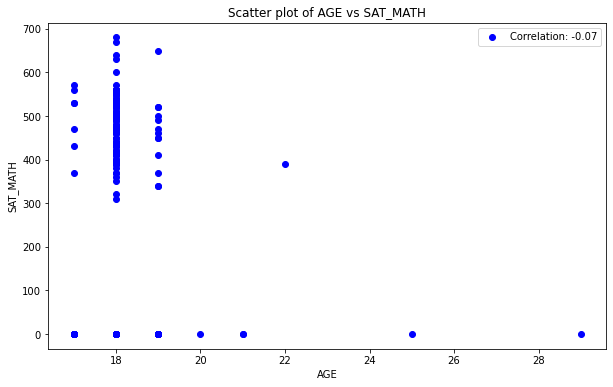

In [77]:
# Calculate Pearson correlation
corr, p_value = pearsonr(df['AGE'], df['SAT_MATH'])
print(f'Pearson correlation coefficient: {corr:.2f}')

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AGE'], df['SAT_MATH'], color='blue', label=f'Correlation: {corr:.2f}')
plt.title('Scatter plot of AGE vs SAT_MATH')
plt.xlabel('AGE')
plt.ylabel('SAT_MATH')
plt.legend()
plt.show()


### Anova Test ###

ANOVA test results: F=3.3952295362053735, p=0.0015829612674988208


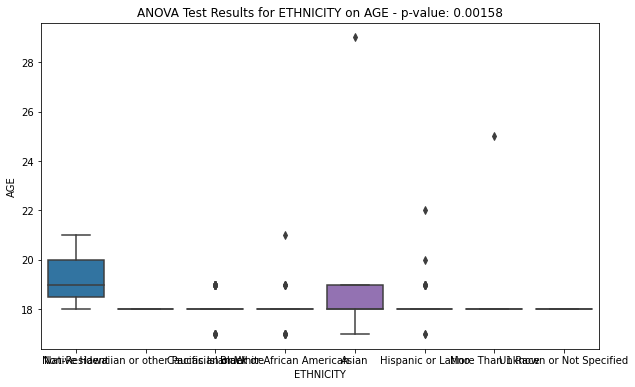

In [81]:
x = 'ETHNICITY'
y ='AGE'

# Perform ANOVA
groups = df.groupby(x)[y].apply(list)
f_val, p_val = stats.f_oneway(*groups)

# Print ANOVA results
print(f"ANOVA test results: F={f_val}, p={p_val}")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=df)
plt.title(f'ANOVA Test Results for {x} on {y} - p-value: {p_val:.5f}')
plt.show()

### One Hot Encoding ###

In [14]:
# File path for file
merge_file_path = '/Users/udoychowdhury/Documents/Assitantship/Merged Conditionally Admitted Students.xlsx'

# Read the Excel file
mergedf = pd.read_excel(merge_file_path)

In [25]:
# Subset numerical columns from categorical
num_cols = pd.DataFrame(mergedf[mergedf.select_dtypes(include = ['float', 'int']).columns])
num_cols.head()

,ID,SPRADDR_CNTY_CODE,AGE,HS_LAT,HS_LONG,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,Total Credits Enrolled,BannerTerm
0,132318,1,21,0.0000,0.0000,0,0,0,0,17,202320
1,131801,29,18,39.8359,-74.2029,0,0,0,0,18,202320
2,130864,29,19,39.8359,-74.2029,0,0,0,0,17,202320
3,132733,23,19,40.4279,-74.3960,650,0,0,0,14,202320
4,132719,15,18,39.7067,-75.1299,510,500,1010,0,13,202320


In [26]:
# Get the categorical variables 
cat_cols = pd.DataFrame(mergedf[mergedf.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['SARADAP_STYP_CODE_2', 'SPRADDR_STAT_CODE', 'SARADAP_ADMT_CODE',
       'ETHNICITY', 'SARAPPD_APDC_CODE', 'SARAPPD_APDC_DATE', 'HS_NAME',
       'HS_CITY', 'HS_STATE', 'HS_COUNTY', 'SPBPERS_SEX', 'DCHS_IND',
       'REC_TEST_PLAN', 'HOUSING_INTEREST', 'FIRST_GEN_IND', 'PCKG_GROUP_IND',
       'HOUS_DEP_PAID', 'FAFSA_IND', 'REC_EOF_LOCATION', 'REC_COUNTRY_OF_ORIG',
       'REC_COMPLETED_DATE', 'E04', 'Registration Status', 'Admissions Status',
       'Matriculation Status', 'Attendance Status', 'Class Level', 'School',
       'Program', 'Degree', 'Maj_Acronym', 'Major', 'Major_Desc', 'Program.1',
       'Concentration', 'Housing', 'Residency'],
      dtype='object')

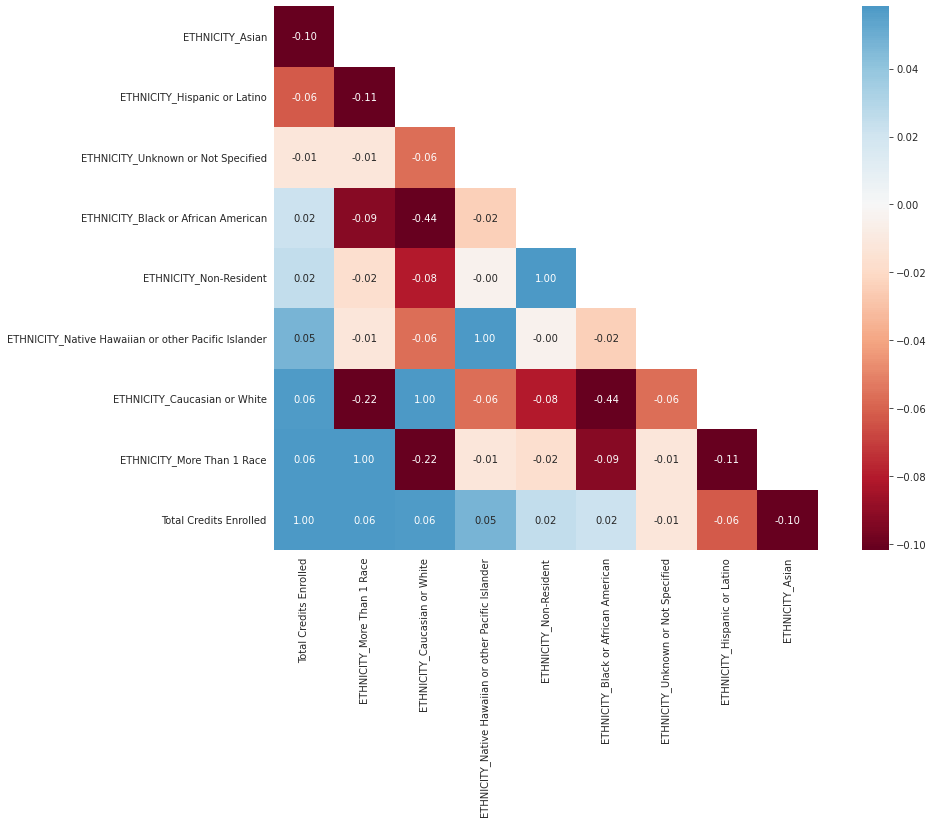

In [39]:
# Transform categorical variables into a form that can be provided to ML algorithms via one-hot encoding
# Specify the columns you want to encode
# Get the categorical variables 
cat_cols = pd.DataFrame(mergedf[mergedf.select_dtypes(include=['object']).columns])
cat_cols.columns
columns_to_encode = ['ETHNICITY'] 

# Transform specified categorical variables into one-hot encoded variables
encoded_cat_cols = pd.get_dummies(cat_cols[columns_to_encode])

# Merge the one-hot encoded categorical columns with 'num_cols' column
cat_cols_corr = pd.concat([encoded_cat_cols, num_cols['Total Credits Enrolled']], axis=1)

# Creates correlation matrix
    # Order it by its correlation to Total Credits Enrolled column wise
corr = cat_cols_corr.corr().sort_values('Total Credits Enrolled', axis=1, ascending=False)
    # Sort by row wise
corr = corr.sort_values('Total Credits Enrolled', axis=0, ascending=True)

# Hide repetitive values (upper triangle)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr['Total Credits Enrolled'].min(),
                    vmax=corr.drop(['Total Credits Enrolled'], axis=0)['Total Credits Enrolled'].max(), 
                    square=True, annot=True, fmt='.2f', center=0, cmap='RdBu', annot_kws={"size": 10})

In [37]:
# Check the number of unique values in each categorical column
unique_values = cat_cols_dropped.nunique()

# Print the number of unique values
print(unique_values)


SARADAP_STYP_CODE_2      1
SPRADDR_STAT_CODE        6
SARADAP_ADMT_CODE        6
ETHNICITY                8
SARAPPD_APDC_CODE        1
HS_STATE                 6
SPBPERS_SEX              3
DCHS_IND                 2
REC_TEST_PLAN            2
HOUSING_INTEREST         2
FIRST_GEN_IND           10
PCKG_GROUP_IND           6
HOUS_DEP_PAID            2
FAFSA_IND                2
REC_EOF_LOCATION         4
REC_COUNTRY_OF_ORIG      3
E04                      3
Registration Status      1
Admissions Status        3
Matriculation Status     1
Attendance Status        1
Class Level              3
School                   6
Degree                   3
Major                   24
Housing                  2
Residency                2
dtype: int64


In [36]:
# List of columns you want to drop
columns_to_drop = ['REC_COMPLETED_DATE', 'HS_CITY', 'HS_NAME', 'SARAPPD_APDC_DATE', 'Program', 'Maj_Acronym', 'Major_Desc','Program.1', 'HS_COUNTY','Concentration']

# Drop the specified columns from cat_cols
cat_cols_dropped = cat_cols.drop(columns=columns_to_drop, axis=1)